In [1]:
#Importing needed libraries/Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re # For regular expression
import datetime as dt
import sqlite3
from sqlalchemy import create_engine
import pandasql as ps
import math

In [27]:
#Defining all dataframes
dfpa = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
dfedv = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
dfav = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
dfreadm = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
dfdis = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
dfpr = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
dfedu = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")

In [7]:
# ---------FUNCTION # 1----------------
#map function helps you to apply the logic mentioned inside to all the items in the iterable list
list(map(lambda x: x[0], dfpa["FirstName"]))

['L',
 'F',
 'D',
 'C',
 'T',
 'J',
 'S',
 'A',
 'D',
 'G',
 'D',
 'Z',
 'S',
 'G',
 'G',
 'F',
 'G',
 'S',
 'D',
 'M',
 'B',
 'J',
 'W',
 'G',
 'L',
 'S',
 'M',
 'J',
 'T',
 'A',
 'H',
 'B',
 'T',
 'T',
 'F',
 'K',
 'S',
 'A',
 'D',
 'C',
 'P',
 'K',
 'R',
 'T',
 'B',
 'D',
 'C',
 'R',
 'A',
 'J',
 'M',
 'B',
 'B',
 'C',
 'J',
 'D',
 'M',
 'P',
 'T',
 'P',
 'H',
 'T',
 'K',
 'H',
 'R',
 'M',
 'E',
 'A',
 'G',
 'V',
 'R',
 'J',
 'L',
 'G',
 'K',
 'A',
 'A',
 'M',
 'M',
 'L',
 'L',
 'C',
 'M',
 'G',
 'A',
 'J',
 'M',
 'G',
 'C',
 'I',
 'V',
 'D',
 'L',
 'L',
 'A',
 'F',
 'S',
 'C',
 'G',
 'P',
 'C',
 'G',
 'J',
 'V',
 'S',
 'F',
 'M',
 'D',
 'C',
 'J',
 'D',
 'K',
 'S',
 'S',
 'Z',
 'G',
 'B',
 'K',
 'T',
 'S',
 'G',
 'H',
 'P',
 'L',
 'M',
 'Z',
 'B',
 'F',
 'G',
 'L',
 'R',
 'C',
 'C',
 'B',
 'C',
 'G',
 'S',
 'D',
 'R',
 'C',
 'D',
 'R',
 'D',
 'E',
 'S',
 'B',
 'B',
 'S',
 'D',
 'E',
 'L',
 'G',
 'M',
 'R',
 'F',
 'C',
 'L',
 'S',
 'I',
 'R',
 'T',
 'G',
 'M',
 'C',
 'F',
 'M',
 'J'

In [8]:
# ---------FUNCTION # 2----------------
#list the indices based on the sorted order of the array
a = np.array([10,3,7,1,0])
print(np.argsort(a))
# [4 3 1 2 0]

[4 3 1 2 0]


In [9]:
# ---------FUNCTION # 3----------------
#get the index of maximum value element in the array
a = np.array([10,3,7,1,0])
print(np.argmax(a))

0


In [10]:
# ---------FUNCTION # 4----------------
#list the indices of the non-zero elements in the array
a = np.array([10,3,7,1,0])
print(np.nonzero(a))

(array([0, 1, 2, 3]),)


In [29]:
# ---------FUNCTION # 5----------------
#Calculate and display the similar array with the cumulative sum of the elements of the array
print(np.cumsum([10,3,7,1,0]))


[10 13 20 21 21]


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age'>

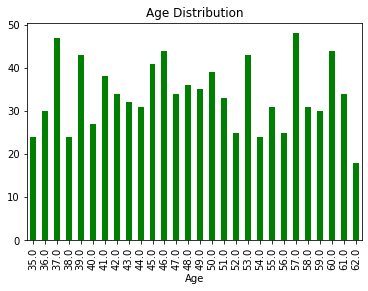

In [28]:
# ---------FUNCTION # 6----------------
#Calculate the Age using timedelta64 function#
import datetime as dt
dfpa['Age']=(dt.datetime.today()\
            -pd.to_datetime(dfpa['DateOfBirth'])).astype('timedelta64[Y]')

dfpa.groupby(["Age"])["PatientID"].count().plot.bar(color = 'green' , title = 'Age Distribution')

In [51]:
# ---------FUNCTION # 7----------------
#ndim returns the dimensions of the object
dfpa.ndim

2

In [3]:
# ---------FUNCTION # 8----------------
#Access single value of dataframe by index
dfpa.iat[1, 5]

'White'

In [4]:
# ---------FUNCTION # 9----------------
#Access single value by label
dfpa.at[20,'LastName']

'King'

In [19]:
# ---------FUNCTION # 10----------------
# importing functools for reduce()
import functools
 
# initializing list
number_list = [5, 17, 1, 5.3, 18, 0]
 
# using reduce to compute sum of list
print("Sum of the elements in the list: ", end="")
print(functools.reduce(lambda a, b: a+b, number_list))
 
# derive the lowest number in the list
print("The lowest element in the list is  : ", end="")
print(functools.reduce(lambda a, b: a if a < b else b, number_list))

# derive the biggest number in the list
print("The biggest element in the list is  : ", end="")
print(functools.reduce(lambda a, b: a if a > b else b, number_list))

Sum of the elements in the list: 46.3
The lowest element in the list is  : 0
The biggest element in the list is  : 18


In [25]:
#------- FUNCTION # 12---------------
#Catching exceptions in code block using try and except
# Python program to handle simple runtime error
#Python 3
 
a = [1, 2, 3]
try:
    print ("Second element = %d" %(a[1]))
 
    # Throws error since there are only 3 elements in array
    print ("Fourth element = %d" %(a[3]))

#specific exceptions can be caught using the error name or generic error message can be displayed
except IndexError :
    print ("Index out of range error")
    

    

Second element = 2
Index out of range error


In [26]:
#------- FUNCTION # 13---------------
#help functions retrives the definition of the functions used in the command, like idxmax here
help(dfpa["PatientID"].idxmax())

Help on int object:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Built-in subclasses:
 |      bool
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil_